In [7]:
## ---------------------------
##
## WGBS-based validation
##
## Downloading the avaliable WGBS data
##
## Authors: Daria Romanovskaia
##
## Date Created: 2021-05-20
##
##
## ---------------------------

In [1]:
source(file.path(Sys.getenv("CODEBASE"),"DNAmeth500species/src/00.0_init.R"))

Warning message:
“package ‘ggrepel’ was built under R version 3.6.3”
Warning message:
“package ‘ggseqlogo’ was built under R version 3.6.3”
Warning message:
“package ‘pheatmap’ was built under R version 3.6.3”
Joining, by = "species"



In [2]:
##needed coverage threshold
COV=5

universal format: bed file, that has columns:
chr start end strand (if exists) coverage meth_ratio 

In [3]:
save_bed <- function(df, path){
    colnames(df) <- c("chr", "start", "end","strand", "coverage", "perc_meth_CpG")
    write.table(df, path, sep = "\t", row.names = F, quote = F)
}

In [4]:
save_bed_nostrand <- function(df, path){
    colnames(df) <- c("chr", "start", "end","coverage", "perc_meth_CpG")
    write.table(df, path, sep = "\t", row.names = F, quote = F)
}

all raw data is predownloaded by hand from GEO

In [5]:
WGBS_dir <- file.path(data_dir, "resources", "WGBS_public")

In [6]:
WGBS_outdir <- file.path(analysis_dir, "validation", "03_WGBS")

In [7]:
wd <- file.path(WGBS_outdir, "03.2_mean_meth")
dir.create(wd)
setwd(wd)

Warning message in dir.create(wd):
“'/binfl/lv71484/droman/DNAmeth500species//results_analysis/validation/03_WGBS/03.2_mean_meth' already exists”


In [6]:
WGBS_RRBS <- fread(file.path(analysis_dir, "validation", "03_WGBS", "WGBS_RRBS_match.txt")) #hand-created file with available WGBS data
head(WGBS_RRBS)

Warning message in fread(file.path(analysis_dir, "validation", "03_WGBS", "WGBS_RRBS_match.txt")):
“Discarded single-line footer: <<ASM1885937v1	turtle	Chelydra serpentina		1	3	3				>>”


genome_db,organism,scientific name,n tisssues,n samples,Individuals,meth call,study link,mean methylation,prediction from sequence,⋯,genome,CG call type,Species,genomeid,description of the suppl file,meth_ratio,comment,genome_to_use,V22,V23
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
,zebrafish 1,Danio rerio,4,8,2 (potentially pooled),no (bw),GSE149416,yes,yes,⋯,GRCz11,raw,ZF,,,,,,NA,
,zebrafish 2,Danio rerio,11,11,likely pooled,no (bw),GSE134055,yes,yes,⋯,GRCz10,raw,ZF,,,,,,NA,
bosTau9,cow,bos taurus,14,23,3,yes,GSE147087,yes,yes,⋯,ARS-UCD1.2,CpG_report,ANW,Bos_taurus,"The column names are: chrmosome, position,strand, coverage for methylated cytosine, coverage for unmethylated cytosine, CG type, three bases near the cytosine.","filter met_count + unmeth_count > 0, meth_count/(meth_count + unmeth_count)",not exact match - subgroup,https://www.ensembl.org/Bos_taurus/Info/Index?db=core,NA,
mm9,mouse,mus musculus,17,17,1,yes,GSE42836,yes,yes,⋯,mm9,CpG.calls,MOU,Mus_musculus,"The processed tables indicate the number of methylated cytosines, total sequencing depth, and %mCG for each CpG dinucleotide, combined over both Watson and Crick strands","cov >5, use %mC",,BSgenome.Mmusculus.UCSC.mm9,NA,
Bl71nemr_1,lancet 1,Branchiostoma lanceolatum,1,1,1,yes,GSE102144,yes,yes,⋯,Bl71nemr,allC,FLA,Branchiostoma lanceolatum_1,Column 1 - assembly (chromosome).column 2 - position: coordinate for the cytosine position on the chromosome (first base of chromosome = 0).column 3 - strand: + or - strand.column 4 - class: context of the cytosine and the two following bases from the same strand.column 5 - mc: number of reads supporting a methylated cytosine.column 6 - h: total number of reads at that position.,filter cov > 5 and the context should be CG*,not exact match,https://www.ncbi.nlm.nih.gov/assembly/GCA_900088365.1,NA,mou
galGal5,chicken 1,Gallus gallus,4,42,7,yes,GSE146620,yes,yes,⋯,galGal5,cpg & coverage,CHK,Gallus_gallus,per CpG coverage and methylation ratio,"provided, filtered: cov > 5",,BSgenome.Ggallus.UCSC.galGal5,NA,


In [10]:
colnames(WGBS_RRBS)

[1] "genome_db"                     "organism"                     
 [3] "scientific name"               "n tisssues"                   
 [5] "n samples"                     "Individuals"                  
 [7] "meth call"                     "study link"                   
 [9] "mean methylation"              "prediction from sequence"     
[11] "individual vs. tissue"         "match in RRBS"                
[13] "comment"                       "genome"                       
[15] "CG call type"                  "Species"                      
[17] "genomeid"                      "description of the suppl file"
[19] "meth_ratio"                    "comment"                      
[21] "genome_to_use"                 "V22"                          
[23] "V23"

In [7]:
unique(WGBS_RRBS$`scientific name`)

[1] "Danio rerio"                         "bos taurus"                         
 [3] "mus musculus"                        "Branchiostoma lanceolatum"          
 [5] "Gallus gallus"                       "Phascolarctos cinereus"             
 [7] "Crassostrea gigas"                   "Xenopus laevis"                     
 [9] "Xenopus laevis x Xenopus tropicalis" "Monodelphis domestica"              
[11] "Ornithorhynchus anatinus"            "Callorhinchus milii"                
[13] "Lethenteron camtschaticum"           "Apis mellifera"                     
[15] "Octopus bimaculoides"

In [12]:
WGBS_RRBS[`scientific name` == "Crassostrea gigas"]

genome_db,organism,scientific name,n tisssues,n samples,Individuals,meth call,study link,mean methylation,prediction from sequence,⋯,genome,CG call type,Species,genomeid,description of the suppl file,meth_ratio,comment,genome_to_use,V22,V23
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
oyster.v9,oyster,Crassostrea gigas,1,2,2,yes,GSE40302,yes,yes,⋯,NA,Cdepth,PAO,Crassostrea_gigas,"Tab-delimited text file that contains all of the cytosines of the whole genome, one cytosine per line. For additional details on the generation of the Cdepth files, please see the 'GSE40302_Cdepth_readme.txt' file, which is linked to the Series record as a supplementary file.","cov >5 and CG context. Two replicas with a lot of additional validations are used, that I ignore",,http://gigadb.org/dataset/100030,NA,


## data type 1 - coverage & ratio (Gallus gallus all tissues except brain)

Data format: individual files with coverage and ratio values for each CpG. Tables are merged together based on the CpG location  
**Meth. ratio is used directly, CpGs are filtered to those, that have coverage more then 5**

In [13]:
## data type 1 - coverage & ratio (Gallus gallus all tissues except brain)

In [28]:
if(!file.exists(file.path(WGBS_dir, "galGal5", "WGBS_annot.csv"))){
    files_list <- list.files(file.path(WGBS_dir, "Gallus_gallus"), pattern = "*.tsv", recursive = T, full.names = T)
    ## making the annotation
    annot <- data.frame(path = files_list,
            path_unif= as.character(sapply(files_list, function(x) gsub(".tsv", ".bed",x))),
           tissue = as.character(sapply(files_list, function(x) gsub("_tissue", "", strsplit(x, "/")[[1]][10]))),
                    replica = as.character(sapply(files_list, function(x) strsplit(strsplit(x, "/")[[1]][11], "_")[[1]][2])), 
                                                  stringsAsFactors = FALSE)
                                           
    ## saving the annotation
     write.table(annot, file.path(WGBS_dir, "Gallus_gallus", "WGBS_annot.csv"), row.names = FALSE, quote = FALSE, sep = ";")
                                           
}else annot <- fread(file.path(WGBS_dir, "Gallus_gallus", "WGBS_annot.csv"))
                                           
meth_file <- "galGal5_GSE146620.csv"

In [30]:
head(annot)

,path,path_unif,tissue,replica
,<chr>,<chr>,<chr>,<chr>
1,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_1_d34.bed,breast,1
2,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_2_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_2_d34.bed,breast,2
3,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_3_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/breast_tissue/Breast_3_d34.bed,breast,3
4,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_1_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_1_d34.bed,ileum,1
5,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_2_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_2_d34.bed,ileum,2
6,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_3_d34.tsv,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/ileum_tissue/Ile_3_d34.bed,ileum,3


In [10]:
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(annot$path[[i]])
    print(NROW(df))
    ### saving the dataframe in the universal format (coverage threshold 0)
    save_bed_nostrand(df[cov>0, c("chr", "start", "end", "cov", "ratio")], annot$path_unif[[i]])
    ## filtering by the COV threshold
    df_sub <- df[df$cov > COV, ]
    print(NROW(df_sub))
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df_sub$ratio)))
}
mean_ratio <- left_join(mean_ratio, annot)
write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)

In [11]:
head(mean_ratio)

path,mean_ratio,path_unif,tissue,replica
<chr>,<dbl>,<chr>,<chr>,<int>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_1_d34.tsv,0.5531137,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_1_d34.bed,breast,1
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_2_d34.tsv,0.5488356,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_2_d34.bed,breast,2
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_3_d34.tsv,0.5383291,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/breast_tissue/Breast_3_d34.bed,breast,3
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_1_d34.tsv,0.5615610,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_1_d34.bed,ileum,1
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_2_d34.tsv,0.5554912,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_2_d34.bed,ileum,2
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_3_d34.tsv,0.5545240,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/galGal5/ileum_tissue/Ile_3_d34.bed,ileum,3


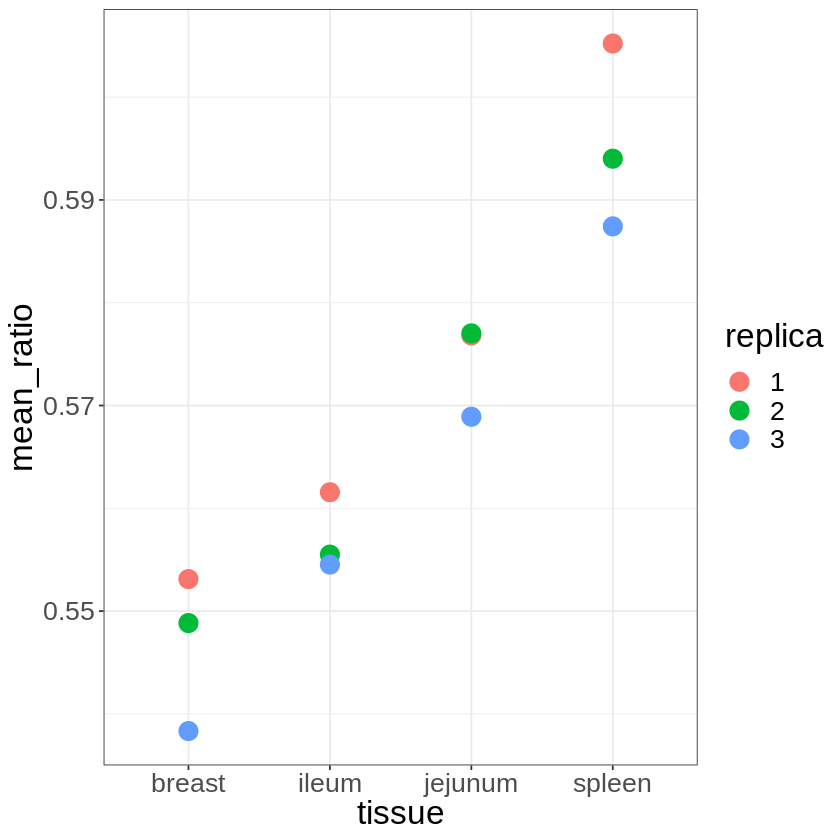

In [44]:
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = replica)) + geom_point(size = 5) + theme_bw() + 
theme(text = element_text(size = 20))
ggsave(gsub("csv", "pdf", meth_file), width = 6, height = 4)

## data type 2 - CpG reports

Data format: Bismark cytosine report tab-delimited text files including chromosome, position, strand, methylated read count, unmethylated read count, cytosine context, and trinucleotide context.  **The methylation ratio is calculated as the mehylation count divided by the sum of the methylated and unmethylated counts (total) for each CpG, where total count is > 0.**

### Koala:

In [68]:
if(!file.exists(file.path(WGBS_dir, "Phascolarctos_cinereus", "WGBS_annot.csv"))){
files_list <- list.files(file.path(WGBS_dir, "Phascolarctos_cinereus"), pattern = "*CpG_report.txt", recursive = T, full.names = T)
annot <- data.frame(path = files_list, 
            path_unif= as.character(sapply(files_list, function(x) gsub("_CpG_report.txt", ".bed",x))),
           tissue = as.character(sapply(files_list, function(x) strsplit(x, "/")[[1]][10])),
           replica = as.character(sapply(files_list, function(x) ifelse(length(grep("PC", x))==1, 1,2))), stringsAsFactors = FALSE)
write.table(annot, file.path(WGBS_dir, "Phascolarctos_cinereus", "WGBS_annot.csv"), 
            row.names = FALSE, quote = FALSE, sep = ";")
}else annot <- fread(file.path(WGBS_dir, "Phascolarctos_cinereus", "WGBS_annot.csv"))

Labeling the PC koala as replica 1, and the Ben - as replica 2

In [13]:
meth_file <- "phaCin_unsw_v4.1_GSE149600.csv"

In [14]:
file.exists(meth_file)

[1] TRUE

In [52]:
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(annot$path[[i]])
    print(NROW(df))
    colnames(df) <- c("chr", "position", "strand", "meth_count", "unmeth_count", "cytosine_context", "trinucleotide_context")
    df <- df[df$cytosine_context == "CG", ]
    df_f <- df %>% mutate(total_count = meth_count + unmeth_count) %>%
        filter(total_count > 0) %>%
        mutate(meth_ratio = meth_count/total_count, end = position + 1)
    save_bed(df_f[,c("chr", "position", "end", "strand", "total_count", "meth_ratio")], annot$path_unif[[i]])
    df_f <- df_f %>% filter(total_count > COV)
    print(NROW(df_f))
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df_f$meth_ratio, na.rm = T)))
}
mean_ratio <- left_join(mean_ratio, annot)
write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)

[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/kidney/GSM4505502_WGM145_06_S3_kidney_PC_CpG_report.txt"
[1] 33523543
[1] 16195533
[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/kidney/GSM4505503_WGM145_08_S4_kidney_Ben_CpG_report.txt"
[1] 33523543
[1] 15700025
[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/lung/GSM4505504_WGM145_09_S5_lung_PC_CpG_report.txt"
[1] 33523543
[1] 16753744
[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/lung/GSM4505505_WGM145_12_S6_lung_Ben_CpG_report.txt"
[1] 33523543
[1] 15345066
[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/pancreas/GSM4505508_WGM145_19_S9_pancreas_PC_CpG_report.txt"
[1] 33523543
[1] 11841532
[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/phaCin_unsw_v4.1/pancreas/GSM4505509_WGM145_20_S10_pancreas_Ben_CpG_report.txt"
[1] 33523543
[

Joining, by = "path"



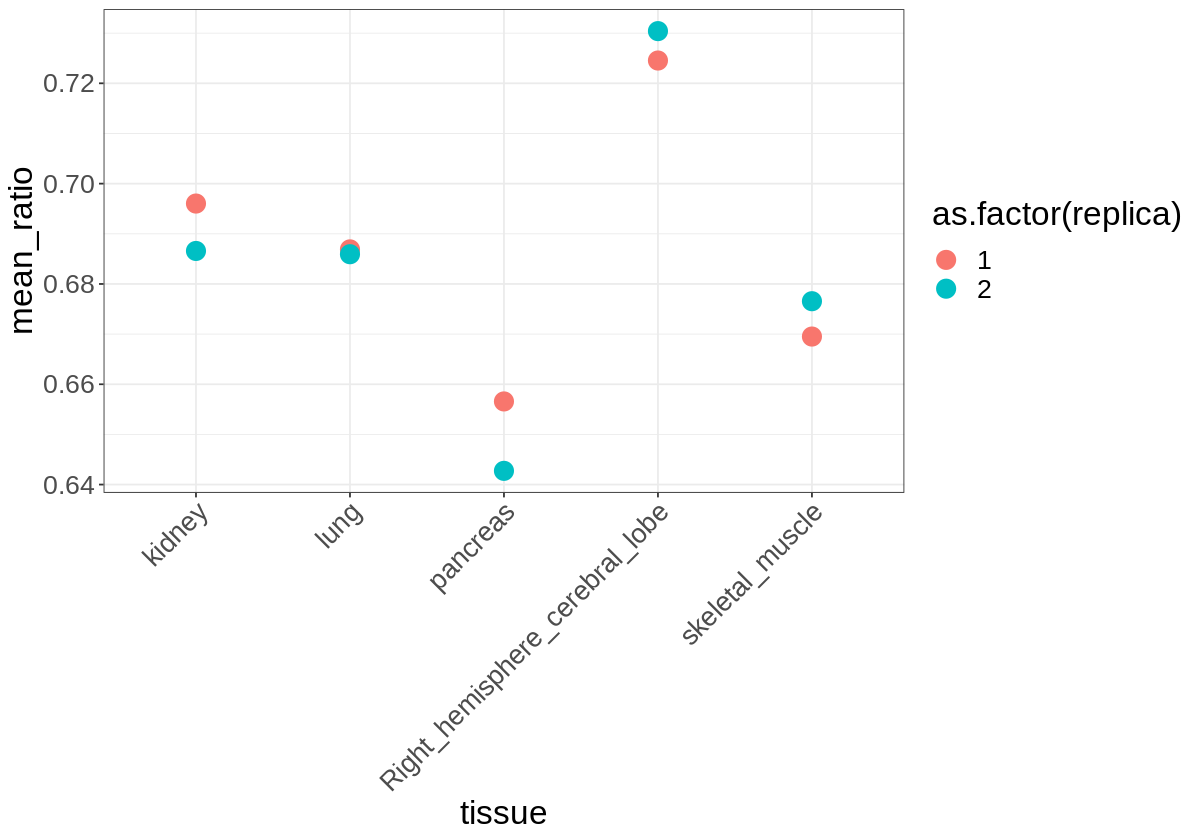

In [12]:
options(repr.plot.width = 10)
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = as.factor(replica))) + geom_point(size = 5) + 
                            theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1))
ggsave(gsub("csv", "pdf", meth_file), width = 6, height = 4)

### cow

In [26]:
if(!file.exists(file.path(WGBS_dir, "Bos_taurus","WGBS_annot.csv"))){
    files_list <- list.files(file.path(WGBS_dir, "Bos_taurus"), pattern = "*CpG_report.txt", recursive = T, full.names = T)
    annot <- data.frame(path = files_list, 
            path_unif= as.character(sapply(files_list, function(x) gsub(".CpG_report.txt", ".bed",x))),
           tissue = as.character(sapply(files_list, function(x) strsplit(x, "/")[[1]][10])),
           replica = as.character(sapply(files_list, function(x) strsplit(x, "_")[[1]][4] )), stringsAsFactors = FALSE)
    write.table(annot, file.path(WGBS_dir, "Bos_taurus","WGBS_annot.csv"), row.names = FALSE, quote = FALSE, sep = ";")
}else annot <- fread(file.path(WGBS_dir, "Bos_taurus","WGBS_annot.csv"))
                                         
meth_file <- "bosTau9_GSE147087.csv"                                         

In [56]:
meth_file <- "bosTau9_GSE147087.csv"

In [15]:
file.exists(meth_file)

[1] TRUE

In [ ]:
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(annot$path[[i]])
    print(NROW(df))
    colnames(df) <- c("chr", "position", "strand", "meth_count", "unmeth_count", "cytosine_context", "trinucleotide_context")
    df <- df[df$cytosine_context == "CG", ]
    df_f <- df %>% mutate(total_count = meth_count + unmeth_count) %>%
        filter(total_count > 0) %>% ## theoretically can be filtered by 5
        mutate(meth_ratio = meth_count/total_count, end = position + 1)
    save_bed(df_f[,c("chr", "position", "end", "strand", "total_count", "meth_ratio")], annot$path_unif[[i]])
    df_f <- df_f %>% filter(total_count > COV)
    print(NROW(df_f))
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df_f$meth_ratio, na.rm = T)))
}
mean_ratio <- left_join(mean_ratio, annot)
write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)

In [57]:
gsub("csv", "pdf", meth_file)

[1] "bosTau9_GSE147087.pdf"

In [ ]:
options(repr.plot.width = 10)
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = replica)) + geom_point(size = 5) + 
                            theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1))
ggsave(gsub("csv", "pdf", meth_file), width = 6, height = 4)

## Data type 3 - CpG calls
### mouse (only)

In [34]:
if(!file.exists(file.path(WGBS_dir, "Mus_musculus", "WGBS_annot.csv")){

files_list <- list.files(file.path(WGBS_dir, "Mus_musculus"), full.names = T,
                         pattern = "*CpG.calls.txt", recursive = T)
    
annot <- data.frame(path = files_list, 
             path_unif= as.character(sapply(files_list, function(x) gsub(".CpG.calls.txt", ".bed",x))),
           tissue = as.character(sapply(files_list, function(x) gsub("mouse_", "", strsplit(x, "/")[[1]][10]))),
                    replica = 1, stringsAsFactors = FALSE)
                                 
write.table(annot, file.path(WGBS_dir, "Mus_musculus", "WGBS_annot.csv"),
            row.names = FALSE, quote = FALSE, sep = ";")
                                 
}else annot <- fread(file.path(WGBS_dir, "Mus_musculus", "WGBS_annot.csv"))

In [ ]:
meth_file <- "mm9_GSE42836.csv"

In [16]:
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(as.character(annot$path[[i]]))

    print(NROW(df))
    colnames(df)[4] <- "CpG_meth"
    colnames(df)[5] <- "CpG_seq"
    colnames(df)[6] <- "CpG_meth_prc"
    df <- df[CpG_seq > 0]
    save_bed_nostrand(df[,c("chromosome", "CpG location left", "CpG location right", "CpG_seq", "CpG_meth_prc")], annot$path_unif[[i]])
    
    df_f <- df[CpG_seq > 5]
    
    print(NROW(df_f))
    
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df_f$CpG_meth_prc, na.rm = T)/100))
}
mean_ratio <- left_join(mean_ratio, annot)
write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)

[1] "../../resources/WGBS_public/Mus_musculus/mouse_bone_marrow/GSM1051150_bone_marrow.CpG.calls.txt"
[1] 16340104
[1] 13527880
[1] "../../resources/WGBS_public/Mus_musculus/mouse_cerebellum/GSM1051151_cerebellum.CpG.calls.txt"
[1] 16421937
[1] 14845151
[1] "../../resources/WGBS_public/Mus_musculus/mouse_colon/GSM1051152_colon.CpG.calls.txt"
[1] 15688707
[1] 13549631
[1] "../../resources/WGBS_public/Mus_musculus/mouse_cortex/GSM1051153_cortex.CpG.calls.txt"
[1] 18193457
[1] 17123077
[1] "../../resources/WGBS_public/Mus_musculus/mouse_heart/GSM1051154_heart.CpG.calls.txt"
[1] 18322700
[1] 15076675
[1] "../../resources/WGBS_public/Mus_musculus/mouse_intestine/GSM1051155_intestine.CpG.calls.txt"
[1] 16932452
[1] 15041450
[1] "../../resources/WGBS_public/Mus_musculus/mouse_kidney/GSM1051156_kidney.CpG.calls.txt"
[1] 16066447
[1] 12370615
[1] "../../resources/WGBS_public/Mus_musculus/mouse_liver/GSM1051157_liver.CpG.calls.txt"
[1] 16791805
[1] 10484432
[1] "../../resources/WGBS_public/Mus_m

Joining, by = "path"



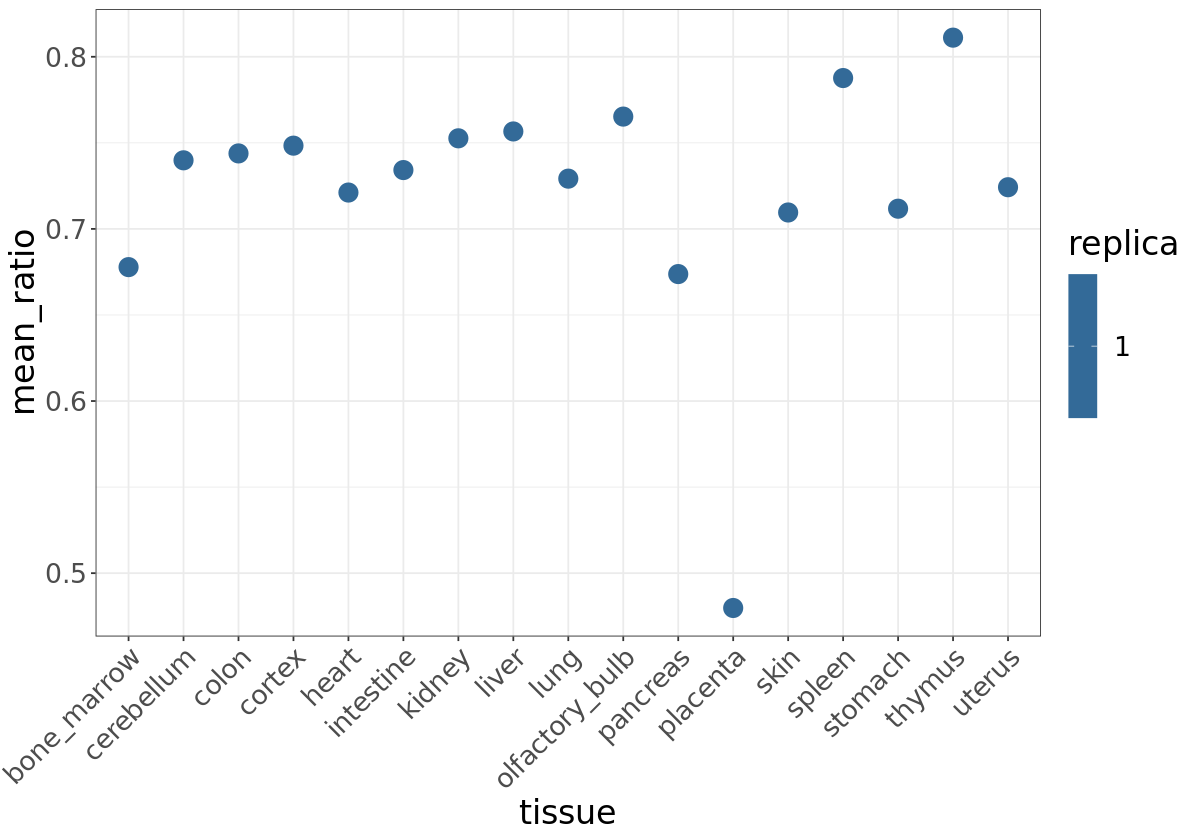

In [17]:
options(repr.plot.width = 10)
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = replica)) + geom_point(size = 5) + 
                            theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1))
ggsave(gsub("csv", "pdf", meth_file), width = 7, height = 4)

## Data type 4 - allC
### Lancelet-1 (only one sample)

In [46]:
files_list <- list.files(file.path(WGBS_dir, "Branchiostoma_lanceolatum_1"), pattern = "*allC.txt", recursive = T, full.names = T)

Column 1 - assembly (chromosome).column 2 - position: coordinate for the cytosine position on the chromosome (first base of chromosome = 0).column 3 - strand: + or - strand.column 4 - class: context of the cytosine and the two following bases from the same strand.column 5 - mc: number of reads supporting a methylated cytosine.column 6 - h: total number of reads at that position.  
**data is filtered by the coverage value > 5 and 

In [47]:
df <- fread(files_list[[1]], header = FALSE) #change to fread, way faster
head(df)

In [34]:
colnames(df) <- c("chr", "position", "strand", "threenucl_context", "mC_count", "coverage")

In [ ]:
#Filtering out non-CpG methylation

In [36]:
df <- df[threenucl_context=="CG"]

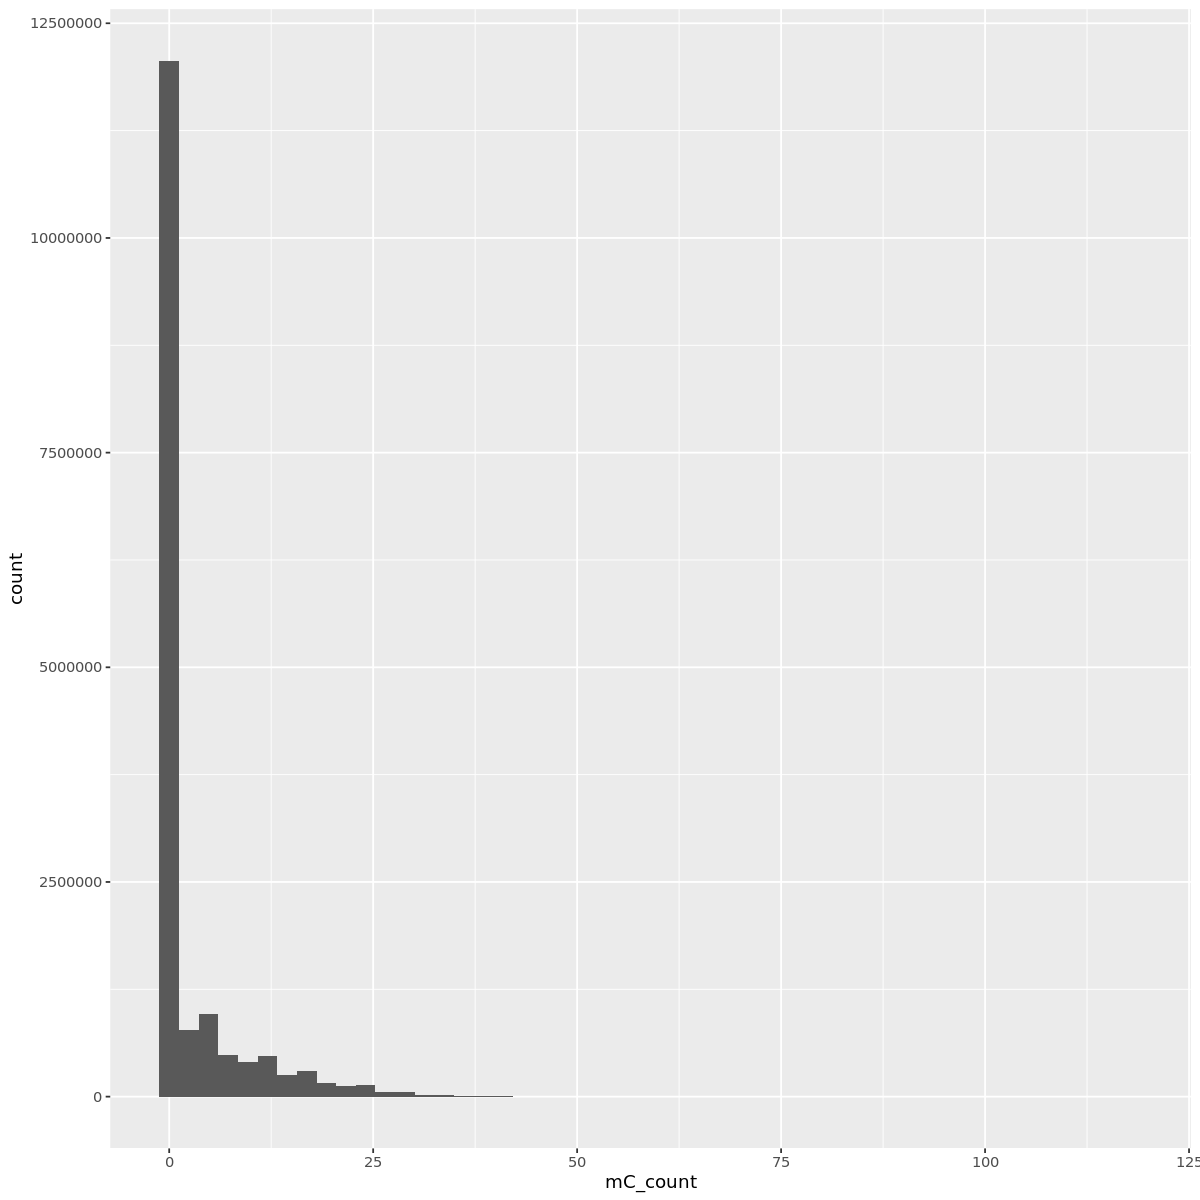

In [89]:
ggplot(df[coverage>2], aes(x = mC_count)) + geom_histogram(bins = 50)

In [38]:
df$meth_ratio = df$mC_count/df$coverage

In [39]:
df[,end:=position + 1,]

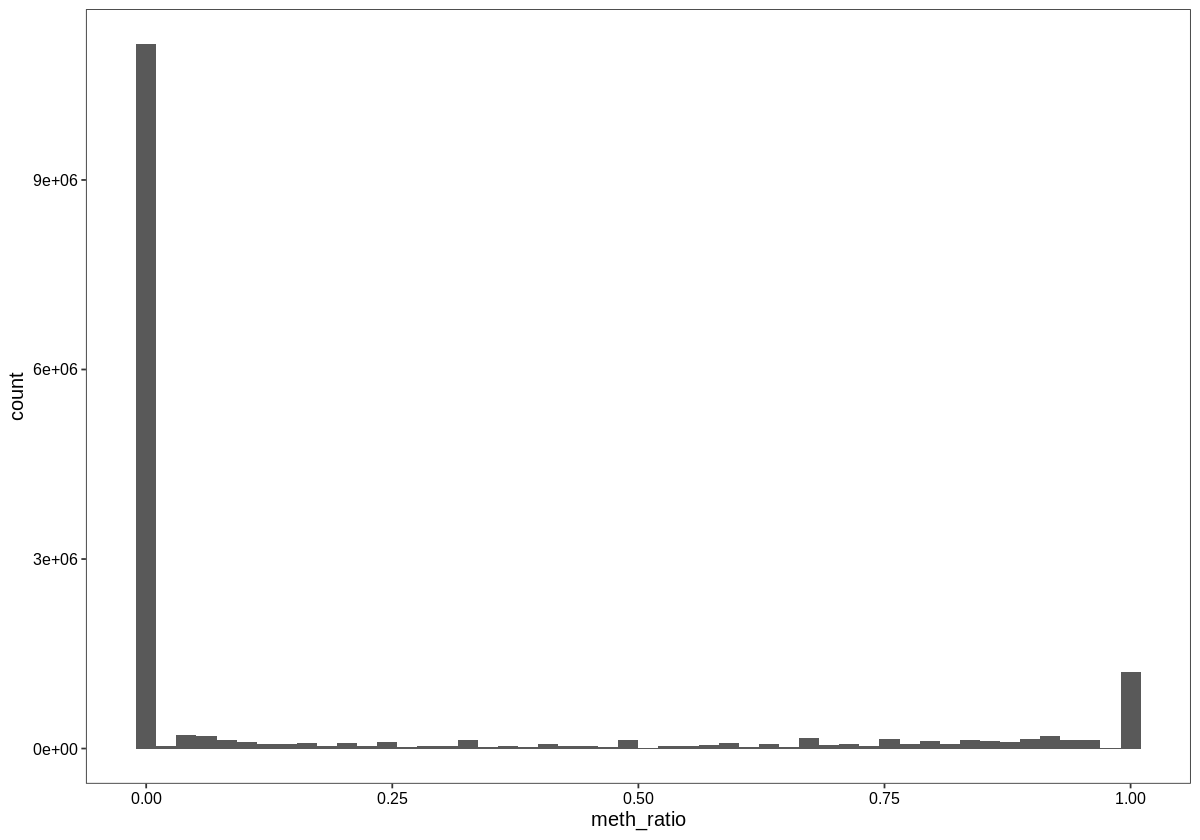

In [40]:
ggplot(df[coverage>2], aes(x = meth_ratio)) + geom_histogram(bins = 50)

In [41]:
save_bed(df[,c("chr", "position", "end", "strand", "coverage", "meth_ratio")], file.path(WGBS_dir, "Bl71nemr", "GSM2728830_liver.bed")) ## moving the file to the rest of the Bl17nmr 

In [50]:
annot_l <- data.frame(path = files_list, 
           tissue = "liver",
           replica = "GSE102144") ##will be saved later together with the other lancet sample

In [51]:
annot_l

path,tissue,replica
<fct>,<fct>,<fct>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Branchiostoma_lanceolatum_1/liver/GSM2728830_liver_MethylC_seq.allC.txt,liver,GSE102144


In [44]:
df <- df[coverage > 5, ]

In [45]:
mean_ratio = data.table(path = files_list[[1]], mean_ratio = mean(df$meth_ratio), replica = 1, tissue = "liver", genomeid = "Bl71nemr_1")

In [46]:
write.table(mean_ratio, "Bl71nemr_GSE102144.csv", sep = ";", quote = F, row.names = F)

## Data type 5 - Cdepth
### oyster

 Tab-delimited text file that contains all of the cytosines of the whole genome, one cytosine per line.  
###### Format:
###### col1: scaffoldID
###### col2: position of the cytosine
###### col3: context of the cytosine 
###### col4: type of the cytosine 
###### col5: strand of the cytosine
###### col6: number of unique reads supporting methylation for replicate1
###### col7: number of unique reads supporting non-methylaion for replicate1
###### col8: number of mismatch for the base following the cytosine for replicate1, just used for filtering mCHGs and mCHHs.
###### col9: number of unique reads supporting methylation for replicate2
###### col10: number of unique reads supporting non-methylaion for replicate2
###### col11: number of mismatch for the base following the cytosine for replicate2, just used for filtering mCHGs and mCHHs.
###### col12: p value of binomial distribution before adjusting by FDR for repliate1
###### col13: p value of binomial distribution after adjusting by FDR for repliate1
###### col14: p value of binomial distribution before adjusting by FDR for repliate2
###### col15: p value of binomial distribution after adjusting by FDR for repliate2
###### col16: p value of binomial distribution before adjusting by FDR for union
###### col17: p value of binomial distribution after adjusting by FDR for union

###### Notice:
###### For mC detection, a cytosine is detected as mC if the p value of binomial distribution after adjusting by FDR is less than 0.01 .

In [17]:
files_list <- list.files(file.path(WGBS_dir, "oyster.v9"), pattern = "*Cdepth.txt", recursive = T, full.names = T)

In [18]:
files_list[[1]]

[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_inbred_individual/GSM991064_Inbred.Cdepth.txt"

In [19]:
annot <- data.frame(path = files_list, 
           tissue = "mantle",
           replica = gsub(".Cdepth.txt", "", as.character(sapply(files_list, function(x) strsplit(x, "_")[[1]][8] ))))
head(annot)

,path,tissue,replica
,<fct>,<fct>,<fct>
1,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_inbred_individual/GSM991064_Inbred.Cdepth.txt,mantle,Inbred
2,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_wild_individual/GSM991065_Wild.Cdepth.txt,mantle,Wild


In [32]:
meth_file <- "oyster.v9_GSE40302.csv"

In [33]:
### extremly long - running as a script on the side
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(as.character(annot$path[[i]]), skip = 26)
    print(NROW(df))
    df <- df[type == "CG"]
    
    colnames(df)[6] <- "mC_dep_rep1"
    colnames(df)[7] <- "non_mC_dep_rep1"
    
    colnames(df)[9] <- "mC_dep_rep2"
    colnames(df)[10] <- "non_mC_dep_rep2"
    
    df$total_rep1 = df$mC_dep_rep1 + df$non_mC_dep_rep1
    df$total_rep2 = df$mC_dep_rep2 + df$non_mC_dep_rep2
 
    
    ## mean in repl 1:
    df_r1 <- df[total_rep1 > 5]
    df_r1$meth_ratio = df_r1$mC_dep_rep1/df_r1$total_rep1
   
    mean_r1 = mean(df_r1$meth_ratio)
    
    
    
    ## mean in repl 2:
    df_r2 <- df[total_rep2 > 5]
    df_r2$meth_ratio = df_r2$mC_dep_rep2/df_r2$total_rep2
   
    mean_r2 = mean(df_r2$meth_ratio)
    
    
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = c(mean_r1, mean_r2), repl = c(1, 2)))
}

mean_ratio <- left_join(mean_ratio, annot)

mean_ratio$replica <- paste0(mean_ratio$replica, "_", mean_ratio$repl)
write.table(mean_ratio[,-3], meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)


In [35]:
mean_ratio

path,mean_ratio,tissue,replica
<chr>,<dbl>,<chr>,<chr>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_inbred_individual/GSM991064_Inbred.Cdepth.txt,0.1108978,mantle,Inbred_1
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_inbred_individual/GSM991064_Inbred.Cdepth.txt,0.1207489,mantle,Inbred_2
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_wild_individual/GSM991065_Wild.Cdepth.txt,0.1150189,mantle,Wild_1
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/oyster.v9/mantle_mantle_of_the_wild_individual/GSM991065_Wild.Cdepth.txt,0.1198798,mantle,Wild_2


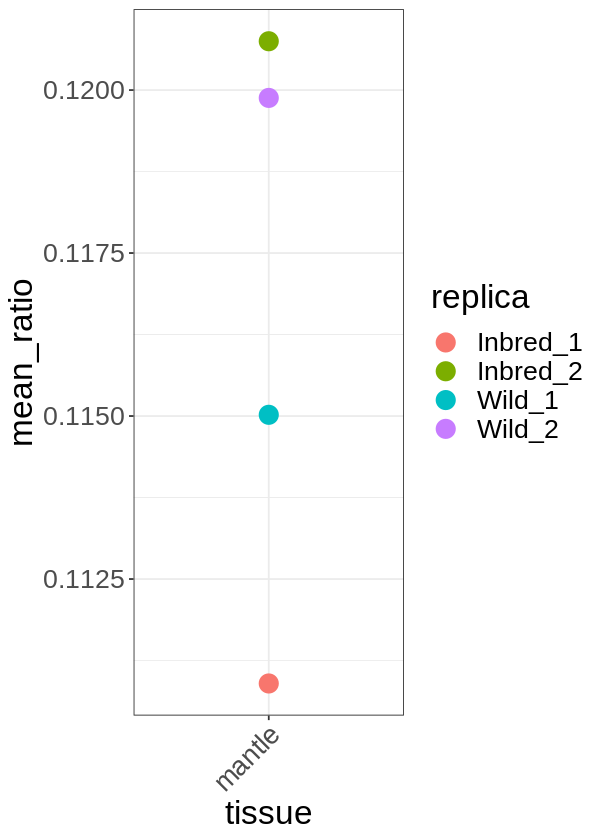

In [37]:
options(repr.plot.width = 5)
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = replica)) + geom_point(size = 5) + 
                            theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1))
ggsave(gsub("csv", "pdf", meth_file), width = 3, height = 4)

## Data type 6 - CGmap
### large brain study across animals
contain chromosome position, (1) chromosome (2) nucleotide on Watson (+) strand (3) position (4) context (CG/CHG/CHH) (5) dinucleotide-context (CA/CC/CG/CT) (6) methylation-level = #_of_C / (#_of_C + #_of_T). (7) #_of_C (methylated C, the count of reads showing C here) (8) = #_of_C + #_of_T (all Cytosines, the  sum of reads showing C or T in that position).

In [37]:
files_list <- list.files(WGBS_dir, pattern = "*.CGmap", recursive = T, full.names = T) #here we collect across genome folders

In [38]:
files_list

[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Apis_mellifera/brain/GSM4209497_mC_brain_queen_honeybee.CGmap"                               
 [2] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Branchiostoma_lanceolatum/Neural_tube/GSM4209500_mC_NeuralTube_amphioxus.CGmap"              
 [3] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Callorhinchus_milii/brain/GSM4209495_mC_brain_elephant_shark.CGmap"                          
 [4] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio/forebrain/GSM4209494_mC_forebrain_zebrafish.CGmap"                               
 [5] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/brain/GSM4209493_mC_brain_chicken.CGmap"                                       
 [6] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Lethenteron_camtschaticum/brain/GSM4209496_mC_brain_arctic_lamprey.CGmap"                    
 [7] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Monodelphis_domestica/brain/GSM4209491_mC_brain_opossum.CGmap"                               
 [8] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Octopus_bimaculoides/Subesophageal_brain/GSM4209499_mC_brain_octopus_subesophageal.CGmap"    
 [9] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Octopus_bimaculoides/Supraesophageal_brain/GSM4209498_mC_brain_octopus_supraesophageal.CGmap"
[10] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Ornithorhynchus_anatinus/frontal_cortex/GSM4209492_mC_brain_platypus.CGmap"

In [39]:
annot <- data.frame(path = files_list, 
           organism = as.character(sapply(files_list, function(x) strsplit(x, "/")[[1]][9])),
           tissue = as.character(sapply(files_list, function(x) strsplit(x, "/")[[1]][10])),
           replica = 1)
head(annot)

,path,organism,tissue,replica
,<fct>,<fct>,<fct>,<dbl>
1,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Apis_mellifera/brain/GSM4209497_mC_brain_queen_honeybee.CGmap,Apis_mellifera,brain,1
2,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Branchiostoma_lanceolatum/Neural_tube/GSM4209500_mC_NeuralTube_amphioxus.CGmap,Branchiostoma_lanceolatum,Neural_tube,1
3,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Callorhinchus_milii/brain/GSM4209495_mC_brain_elephant_shark.CGmap,Callorhinchus_milii,brain,1
4,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio/forebrain/GSM4209494_mC_forebrain_zebrafish.CGmap,Danio_rerio,forebrain,1
5,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Gallus_gallus/brain/GSM4209493_mC_brain_chicken.CGmap,Gallus_gallus,brain,1
6,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Lethenteron_camtschaticum/brain/GSM4209496_mC_brain_arctic_lamprey.CGmap,Lethenteron_camtschaticum,brain,1


### saving annotation indiv. and bed only lancelet :) 

In [40]:
files_list[[2]]

[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Branchiostoma_lanceolatum/Neural_tube/GSM4209500_mC_NeuralTube_amphioxus.CGmap"

In [42]:
annot_l1 <- data.frame(path = files_list[[2]], 
           tissue = "Neural_tube",
           replica = "GSE141609")

In [53]:
write.table(rbind(annot_l, annot_l1),file.path(WGBS_dir, "Branchiostoma_lanceolatum", "WGBS_annot.csv"))

In [123]:
write.table(annot, "../../resources/WGBS_public/Branchiostoma_lanceolatum/WGBS_annot.csv", row.names = FALSE, quote = FALSE, sep = ";")

In [119]:
i <- 2
df <- fread(as.character(files_list[[i]]))
colnames(df) <- c("chr", "nucleotide", "position", "context", "dinucl_context", "meth_level", "meth_read_count", "all_C_count")
df <- df[context=="CG"]

In [120]:
head(df)

chr,nucleotide,position,context,dinucl_context,meth_level,meth_read_count,all_C_count
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
chrL,C,4,CG,CG,0.00267380,1,374
chrL,G,5,CG,CG,0.00172117,1,581
chrL,C,7,CG,CG,0.00531915,2,376
chrL,G,8,CG,CG,0.00343053,2,583
chrL,C,13,CG,CG,0.00522193,2,383
chrL,G,14,CG,CG,0.00000000,0,592


In [124]:
df[, end:=position + 1, ]

In [127]:
save_bed_nostrand(df[,c("chr", "position", "end", "all_C_count", "meth_level")], file.path(WGBS_dir, "Bl71nemr", "GSM4209500_mC_NeuralTube.bed")

In [41]:
meth_file <- "Combined_study_GSE141609.csv"

In [52]:
df <- fread(as.character(annot$path[[2]]))

In [53]:
head(df)

V1,V2,V3,V4,V5,V6,V7,V8
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
chrL,G,1,--,--,0.01398600,8,572
chrL,G,2,--,--,0.00000000,0,578
chrL,G,3,CHH,CC,0.00000000,0,580
chrL,C,4,CG,CG,0.00267380,1,374
chrL,G,5,CG,CG,0.00172117,1,581
chrL,G,6,CHG,CC,0.00343053,2,583


In [54]:
colnames(df) <- c("chr", "nucleotide", "position", "context", "dinucl_context", "meth_level", "meth_read_count", "all_C_count")
    df <- df[context=="CG"]

In [55]:
head(df)

chr,nucleotide,position,context,dinucl_context,meth_level,meth_read_count,all_C_count
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
chrL,C,4,CG,CG,0.00267380,1,374
chrL,G,5,CG,CG,0.00172117,1,581
chrL,C,7,CG,CG,0.00531915,2,376
chrL,G,8,CG,CG,0.00343053,2,583
chrL,C,13,CG,CG,0.00522193,2,383
chrL,G,14,CG,CG,0.00000000,0,592


In [49]:
#mean_ratio = data.table()

In [56]:
df <- df[all_C_count > 5]

In [57]:
mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[1]]),
                                           mean_ratio = mean(df$meth_level)))

In [58]:
mean_ratio

path,mean_ratio
<fct>,<dbl>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Apis_mellifera.GCA_000002195.1.31.dna/brain/GSM4209497_mC_brain_queen_honeybee.CGmap,0.00670899
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Apis_mellifera.GCA_000002195.1.31.dna/brain/GSM4209497_mC_brain_queen_honeybee.CGmap,0.18028377


In [ ]:
if(!file.exists(meth_file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot))){
    print(annot$path[[i]])
    df <- fread(as.character(annot$path[[i]]))
    print(NROW(df))
    colnames(df) <- c("chr", "nucleotide", "position", "context", "dinucl_context", "meth_level", "meth_read_count", "all_C_count")
    df <- df[context=="CG"]
    df <- df[all_C_count > 5]
    mean_ratio <- rbind(mean_ratio, data.frame(path = as.character(annot$path[[i]]), mean_ratio = mean(df$meth_level)))
}

mean_ratio <- left_join(mean_ratio, annot)
write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)
}else mean_ratio <- fread(meth_file)

In [ ]:
head(mean_ratio)

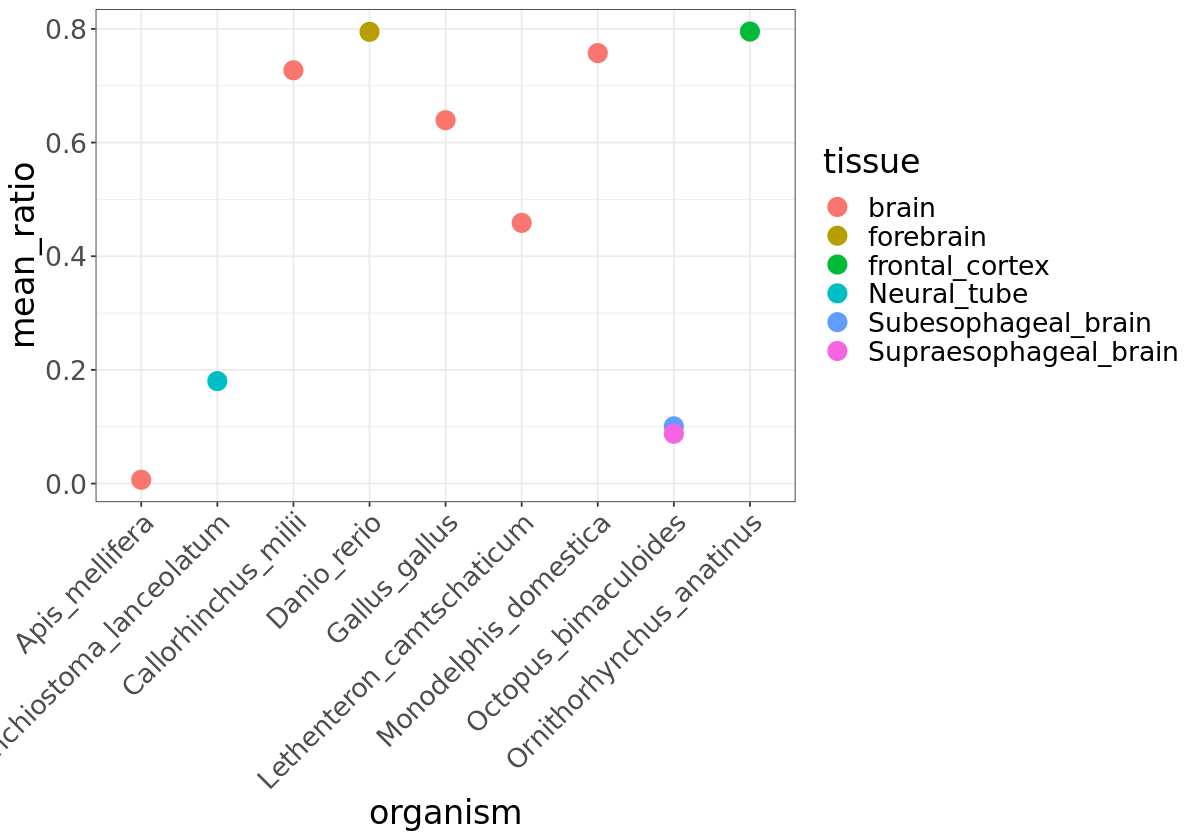

In [13]:
options(repr.plot.width = 10)
ggplot(mean_ratio, aes(x = organism, y = mean_ratio, color = tissue)) + geom_point(size = 5) + 
                            theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1))
ggsave(gsub("csv", "pdf", meth_file), width = 10, height = 4)

## Data type 7 - gemBS output
Zebrafish processed from the raw data (gemBS pipeline, ran by Bekir)  
File description is at: http://statgen.cnag.cat/GEMBS/UserGuide/_build/html/pipelineExtract.html - ENCODE BED9+5 bedMethyl format


In [54]:
annot <- fread(file.path(WGBS_dir, "Danio_rerio_gemBS", "BSX_0021_Zebrafish_WGBS_wgbs_gembs_samples.csv"))
head(annot)

raw_file_GSM,tissue,replica,sample_name,barcode,dataset,flowcell,lane,platform,center,file1,file2,library,type
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM4824409,heart,1,GSM4824409_heart_1,SRR12797058,SRR12797058,NA,NA,HiSeq,external,SRR12797058_1.fastq,SRR12797058_2.fastq,GSE149416,Paired
GSM4824410,heart,2,GSM4824410_heart_2,SRR12797059,SRR12797059,NA,NA,HiSeq,external,SRR12797059_1.fastq,SRR12797059_2.fastq,GSE149416,Paired
GSM4824411,intestine,1,GSM4824411_intestine_1,SRR12797060,SRR12797060,NA,NA,HiSeq,external,SRR12797060_1.fastq,SRR12797060_2.fastq,GSE149416,Paired
GSM4824412,intestine,2,GSM4824412_intestine_2,SRR12797061,SRR12797061,NA,NA,HiSeq,external,SRR12797061_1.fastq,SRR12797061_2.fastq,GSE149416,Paired
GSM4824413,skin,1,GSM4824413_skin_1,SRR12797062,SRR12797062,NA,NA,HiSeq,external,SRR12797062_1.fastq,SRR12797062_2.fastq,GSE149416,Paired
GSM4824414,skin,2,GSM4824414_skin_2,SRR12797063,SRR12797063,NA,NA,HiSeq,external,SRR12797063_1.fastq,SRR12797063_2.fastq,GSE149416,Paired


In [55]:
annot[, path:=paste0(file.path(WGBS_dir, "Danio_rerio_gemBS","extract/"), dataset, "_cpg.bed.gz"),]

In [56]:
annot[, path_bed:=paste0(WGBS_dir, "/Danio_rerio_", library,"/", sample_name, ".bed"),]

In [57]:
colnames(annot)[16] <- "path_unif" 

In [58]:
head(annot)

raw_file_GSM,tissue,replica,sample_name,barcode,dataset,flowcell,lane,platform,center,file1,file2,library,type,path,path_unif
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM4824409,heart,1,GSM4824409_heart_1,SRR12797058,SRR12797058,NA,NA,HiSeq,external,SRR12797058_1.fastq,SRR12797058_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797058_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824409_heart_1.bed
GSM4824410,heart,2,GSM4824410_heart_2,SRR12797059,SRR12797059,NA,NA,HiSeq,external,SRR12797059_1.fastq,SRR12797059_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797059_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824410_heart_2.bed
GSM4824411,intestine,1,GSM4824411_intestine_1,SRR12797060,SRR12797060,NA,NA,HiSeq,external,SRR12797060_1.fastq,SRR12797060_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797060_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824411_intestine_1.bed
GSM4824412,intestine,2,GSM4824412_intestine_2,SRR12797061,SRR12797061,NA,NA,HiSeq,external,SRR12797061_1.fastq,SRR12797061_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797061_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824412_intestine_2.bed
GSM4824413,skin,1,GSM4824413_skin_1,SRR12797062,SRR12797062,NA,NA,HiSeq,external,SRR12797062_1.fastq,SRR12797062_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797062_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824413_skin_1.bed
GSM4824414,skin,2,GSM4824414_skin_2,SRR12797063,SRR12797063,NA,NA,HiSeq,external,SRR12797063_1.fastq,SRR12797063_2.fastq,GSE149416,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12797063_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Danio_rerio_GSE149416/GSM4824414_skin_2.bed


In [61]:
write.table(annot[library == "GSE149416",c("path","path_unif","tissue","replica")], paste0(WGBS_dir, "/Danio_rerio_GSE149416/WGBS_annot.csv"), row.names = FALSE, quote = FALSE, sep = ";")

In [62]:
write.table(annot[library == "GSE134055",c("path","path_unif","tissue","replica")], paste0(WGBS_dir, "/Danio_rerio_GSE134055/WGBS_annot.csv"), row.names = FALSE, quote = FALSE, sep = ";")

In [ ]:
meth.file <- "danRer11_GSE149416.csv"

In [28]:
if(!file.exists(meth.file)){
mean_ratio = data.table()
for(i in c(1:NROW(annot[library == "GSE149416"]) + 1)){  ##processed the first & blood from the second
    print(annot$path[[i]])
    df <- fread(annot$path[[i]], skip = 1)
    save_bed(df[, c(1,2,3,6,10,11)], annot$path_bed[[i]])
    mean_r = mean(df[V10 > 5]$V11)
    mean_ratio <- rbind(mean_ratio, data.frame(path = annot$path[[i]], mean_ratio = mean_r))
    mean_ratio <- left_join(mean_ratio, annot)
    write.table(mean_ratio[library == "GSE149416",],  "../validation/WGBS_public/Danio_rerio_GSE149416.csv", sep = ";", quote = F, row.names = F)
    }   
}else mean_ratio <- fread(meth.file)

Here we have two files for each run, making it even more fun!

In [51]:
mean_ratio <- left_join(mean_ratio, annot)

Joining, by = "path"



In [56]:
write.table(mean_ratio[library == "GSE149416",],  "../validation/WGBS_public/Danio_rerio_GSE149416.csv", sep = ";", quote = F, row.names = F)

In [57]:
mean_ratio <- mean_ratio[library == "GSE134055",c(path, mean_ratio)]

In [61]:
mean_ratio

path,mean_ratio
<fct>,<dbl>
../../resources/WGBS_public/Danio_rerio_gemBS/extract/SRR12173554_cpg.bed.gz,76.22891


In [40]:
annot_double <- annot[c((NROW(annot[library == "GSE149416"])+2):NROW(annot))]

In [66]:
df1 <- fread(annot_double$path[[1]], skip =1)

In [67]:
df2 <- fread(annot_double$path[[2]], skip = 1)

In [68]:
head(df1)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>
chr1,81,82,GSM4662071_Brain_1,3,+,81,82,"255,0,0",3,100,CG,MG,2
chr1,82,83,GSM4662071_Brain_1,5,-,82,83,"255,0,0",5,100,CG,CK,20
chr1,92,93,GSM4662071_Brain_1,3,+,92,93,"255,155,0",3,66,CG,CG,19
chr1,93,94,GSM4662071_Brain_1,6,-,93,94,"255,105,0",6,83,CG,CG,16
chr1,149,150,GSM4662071_Brain_1,11,+,149,150,"255,55,0",11,90,CG,CG,42
chr1,150,151,GSM4662071_Brain_1,6,-,150,151,"255,105,0",6,83,CG,CG,40


In [69]:
head(df2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>
chr1,81,82,GSM4662071_Brain_1,4,+,81,82,"255,0,0",4,100,CG,CG,11
chr1,82,83,GSM4662071_Brain_1,1,-,82,83,"255,0,0",1,100,CG,CG,11
chr1,92,93,GSM4662071_Brain_1,5,+,92,93,"255,105,0",5,80,CG,CG,8
chr1,93,94,GSM4662071_Brain_1,2,-,93,94,"255,255,0",2,50,CG,CG,14
chr1,149,150,GSM4662071_Brain_1,5,+,149,150,"255,0,0",5,100,CG,CG,23
chr1,150,151,GSM4662071_Brain_1,4,-,150,151,"255,0,0",4,100,CG,CG,26


In [70]:
colnames(df1)[c(1:3)] <- c("chr", "start", "end")
colnames(df2)[c(1:3)] <- c("chr", "start", "end")

In [73]:
colnames(df1)[6] <- "strand"
colnames(df2)[6] <- "strand"

In [76]:
colnames(df1)[c(10,11)] <- c("coverage_1", "perc_1")
colnames(df2)[c(10,11)] <- c("coverage_2", "perc_2")

In [77]:
df <- full_join(df1[, c("chr", "start", "end","strand", "coverage_1", "perc_1" )], df2[, c("chr", "start", "end","strand", "coverage_2", "perc_2" )])

Joining, by = c("chr", "start", "end", "strand")



In [98]:
head(df)

chr,start,end,strand,coverage_1,perc_1,coverage_2,perc_2,cov_total,perc_total
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
chr1,81,82,+,3,100,4,100,7,100.000
chr1,82,83,-,5,100,1,100,6,100.000
chr1,92,93,+,3,66,5,80,8,74.750
chr1,93,94,-,6,83,2,50,8,74.750
chr1,149,150,+,11,90,5,100,16,93.125
chr1,150,151,-,6,83,4,100,10,89.800


In [92]:
weighted.mean(c(100,100), c(3,4))

[1] 100

In [84]:
df[is.na(coverage_1), coverage_1 :=0, ]

In [85]:
df[is.na(coverage_2), coverage_2 :=0, ]

In [86]:
df[, cov_total := coverage_1 + coverage_2, ]

In [97]:
df[,perc_total:= weighted.mean(c(perc_1, perc_2), c(coverage_1, coverage_2)), by = list(chr, start, end)]

In [101]:
save_bed(df[,c("chr", "start", "end", "strand", "cov_total", "perc_total")], annot_double$path_bed[1])

In [102]:
mean_r = mean(df$perc_total)

In [103]:
mean_r

[1] 78.32336

In [1]:
mean_ratio

ERROR: Error in eval(expr, envir, enclos): object 'mean_ratio' not found


In [105]:
mean_ratio <- rbind(mean_ratio, data.frame(path = annot_double$path[[1]], mean_ratio = mean_r))

In [ ]:
for(i in seq(3, NROW(annot_double), 2)){
    print(annot_double$path[[i]])
    df1 <- fread(annot$path[[i]], skip = 1)
    df2 <- fread(annot$path[[i+1]], skip = 1)
    ## transforming
    colnames(df1)[c(1:3)] <- c("chr", "start", "end")
    colnames(df2)[c(1:3)] <- c("chr", "start", "end")
    
    colnames(df1)[6] <- "strand"
    colnames(df2)[6] <- "strand"
    
    colnames(df1)[c(10,11)] <- c("coverage_1", "perc_1")
    colnames(df2)[c(10,11)] <- c("coverage_2", "perc_2")
    
    df <- full_join(df1[, c("chr", "start", "end","strand", "coverage_1", "perc_1" )], df2[, c("chr", "start", "end","strand", "coverage_2", "perc_2" )])
    
    df[is.na(coverage_1), coverage_1 :=0, ]
    df[is.na(coverage_2), coverage_2 :=0, ]
    
    df[, cov_total := coverage_1 + coverage_2, ]
    
    df[,perc_total:= weighted.mean(c(perc_1, perc_2), c(coverage_1, coverage_2)), by = list(chr, start, end)]
    save_bed(df[,c("chr", "start", "end", "strand", "cov_total", "perc_total")], annot_double$path_bed[1])
    
    
    mean_r = mean(df$perc_total)
    
    mean_ratio <- rbind(mean_ratio, data.frame(path = annot_double$path[[i]], mean_ratio = mean_r))
}

## Data type 8 - allCG

In [9]:
files_list <- list.files(file.path(WGBS_dir, "Xenopus_laevis/"), 
                         pattern = "*allCG.txt", recursive = T, full.names = T)
files_list

[1] "/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5_allCG.txt"

In [12]:
annot <- data.frame(path = files_list[[1]],tissue = "embryo",
           replica = 1, path_unif = gsub("_allCG.txt", ".bed",files_list[[1]] ))

In [13]:
annot

path,tissue,replica,path_unif
<fct>,<fct>,<dbl>,<fct>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5_allCG.txt,embryo,1,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5.bed


In [10]:
df <- fread(files_list[[1]])
head(df)
colnames(df) <- c("chr", "start", "end", "C_calls", "coverage")

df$meth_ratio = df$C_calls/df$coverage

df <- df[coverage > 5]



mean_ratio = data.table(path = files_list[[1]],
                        mean_ratio = mean(df$meth_ratio), 
                        replica = 2, tissue = "embryo", genomeid = "Xenopus_laevis")

#write.table(mean_ratio, "Xenopus_laevis_GSM1977638.csv", sep = ";", quote = F, row.names = F)

V1,V2,V3,V4,V5
<chr>,<int>,<int>,<int>,<int>
11,143,143,5,6
11,144,144,2,2
11,151,151,6,6
11,152,152,2,2
11,161,161,5,6
11,162,162,2,2


In [11]:
head(df)

chr,start,end,C_calls,coverage,meth_ratio
<chr>,<int>,<int>,<int>,<int>,<dbl>
11,143,143,5,6,0.8333333
11,151,151,6,6,1.0000000
11,161,161,5,6,0.8333333
11,256,256,23,23,1.0000000
11,269,269,30,30,1.0000000
11,270,270,8,8,1.0000000


In [16]:
save_bed_nostrand(df[,c("chr", "start", "end", "coverage", "meth_ratio")], as.character(annot$path_unif[1]))

In [15]:
annot$path_unif[1]

[1] /binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5.bed
Levels: /binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Xenopus_laevis//GSM1977638_xl_st10.5.bed

## Data type 6 again - allC

In [36]:
files_list <- list.files(file.path(WGBS_dir, "Xenopus_laevis/"), 
                         pattern = "*allC.txt", recursive = T, full.names = T)
files_list

annot <- rbind(annot, data.frame(path = files_list[[1]],tissue = "embryo",
           replica = 2, path_unif = gsub("allC.txt", ".bed",files_list[[1]] )))

annot

my_wt(annot,file.path(WGBS_dir,"Xenopus_laevis", "WGBS_annot.csv" ))

files_list[[1]]

df <- fread(files_list[[1]]) #change to fread, way faster
head(df)

colnames(df) <- c("chr", "position", "strand", "threenucl_context", "mC_count", "coverage")

#Filtering out non-CpG methylation

df <- df[threenucl_context=="CG"]

df$meth_ratio = df$mC_count/df$coverage

df[,end:=position + 1,]

save_bed(df[,c("chr", "position", "end", "strand", "coverage", "meth_ratio")], file.path(WGBS_dir, "Bl71nemr", "GSM2728830_liver.bed")) ## moving the file to the rest of the Bl17nmr 

## the turtle

In [22]:
if(!file.exists(file.path(WGBS_dir,"Chelydra_serpentina", "WGBS_annot.csv" ))){
    files_list <- list.files(file.path(WGBS_dir, "Chelydra_serpentina"), 
                         pattern = ".cov.gz", recursive = T, full.names = T)
    annot <-data.frame(path = files_list,tissue = "heart",
           replica = seq(1,length(files_list)), path_unif = gsub(".cov.gz", ".bed",files_list))
    my_wt(annot,file.path(WGBS_dir,"Chelydra_serpentina", "WGBS_annot.csv" ))
    
}else{
    annot <- fread(file.path(WGBS_dir,"Chelydra_serpentina", "WGBS_annot.csv" ))
}


In [40]:
meth_file = "Chelydra_serpentina.csv"

In [38]:
if(!file.exists(meth_file)){

mean_ratio = data.table()
for( i in 1:NROW(annot)){
    
df <- fread(files_list[[i]]) #change to fread, way faster
df[, cov:= V5 + V6, by = row.names(df)]
head(df)
df <- df[cov > 5]
df[, meth_perc:= V4/100, by = row.names(df)]

#c("chr", "start", "end","coverage", "perc_meth_CpG")
save_bed_nostrand(df = df[,c("V1", "V2", "V3", "cov", "meth_perc")], 
                  path = as.character(annot$path_unif[[i]]))

mean_r = mean(df$meth_perc)
    
mean_ratio <- rbind(mean_ratio, data.frame(path = annot$path[[i]], mean_ratio = mean_r))
mean_ratio <- left_join(mean_ratio, annot)
 write.table(mean_ratio, meth_file, sep = ";", quote = F, row.names = F)   
}
    
}else{
    mean_ratio <- fread(meth_file)
}


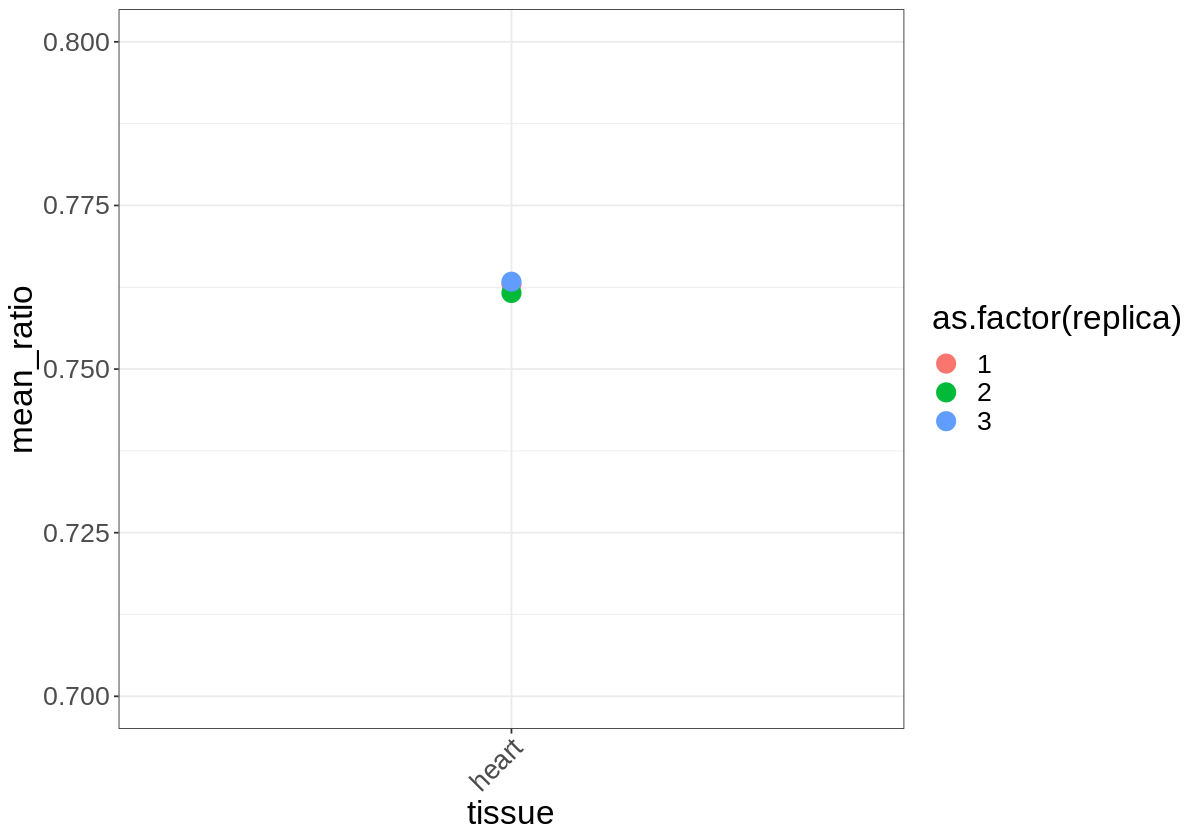

In [52]:
options(repr.plot.width = 10)
ggplot(mean_ratio, aes(x = tissue, y = mean_ratio, color = as.factor(replica))) + 
geom_point(size = 5) +      theme_bw() + 
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) + 
ylim(c(0.7,0.8))
ggsave(gsub("csv", "pdf", meth_file), width = 10, height = 4)

## gemBS for Parus Major

In [8]:
annot <- fread(file.path(WGBS_dir, "Parus_major_gemBS", "Parus_major_WGBS_wgbs_gembs_samples.csv"))
head(annot)

raw_file_GSM,tissue,replica,sample_name,barcode,dataset,flowcell,lane,platform,center,file1,file2,library,type
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PRJNA574487,brain,1,GSMXXX_brain_1,SRR2070790,SRR2070790,NA,NA,HiSeq,external,SRR2070790_1.fastq,SRR2070790_2.fastq,PRJNA574487,Paired


In [13]:
annot[, path:=paste0(file.path(WGBS_dir, "Parus_major_gemBS","extract/"), dataset, "_cpg.bed.gz"),]

In [14]:
annot[, path_unif:=paste0(WGBS_dir, "/Parus_major_gemBS/", sample_name, ".bed"),]

In [15]:
annot

raw_file_GSM,tissue,replica,sample_name,barcode,dataset,flowcell,lane,platform,center,file1,file2,library,type,path,path_unif
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PRJNA574487,brain,1,GSMXXX_brain_1,SRR2070790,SRR2070790,NA,NA,HiSeq,external,SRR2070790_1.fastq,SRR2070790_2.fastq,PRJNA574487,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Parus_major_gemBS/extract/SRR2070790_cpg.bed.gz,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Parus_major_gemBS/GSMXXX_brain_1.bed


In [16]:
df <- fread(annot$path[[1]], skip = 1)

In [17]:
head(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>
NC_031768.1,42,43,GSMXXX_brain_1,3,+,42,43,"255,0,0",3,100,CG,CG,62
NC_031768.1,43,44,GSMXXX_brain_1,20,-,43,44,"255,55,0",20,85,CG,CG,36
NC_031768.1,207,208,GSMXXX_brain_1,12,+,207,208,"255,155,0",12,66,CG,CG,255
NC_031768.1,208,209,GSMXXX_brain_1,61,-,208,209,"255,105,0",61,78,CG,CG,91
NC_031768.1,249,250,GSMXXX_brain_1,15,+,249,250,"255,205,0",15,60,CG,YG,255
NC_031768.1,250,251,GSMXXX_brain_1,70,-,250,251,"255,205,0",70,64,CG,CR,60


In [18]:
save_bed(df[, c(1,2,3,6,10,11)], annot$path_unif[[1]])

In [20]:
mean_r = mean(df[V10 > 5]$V11)

In [21]:
mean_ratio <-  data.frame(path = annot$path[[1]], mean_ratio = mean_r)
    mean_ratio <- left_join(mean_ratio, annot)

Joining, by = "path"



In [22]:
mean_ratio

path,mean_ratio,raw_file_GSM,tissue,replica,sample_name,barcode,dataset,flowcell,lane,platform,center,file1,file2,library,type,path_unif
<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Parus_major_gemBS/extract/SRR2070790_cpg.bed.gz,51.06399,PRJNA574487,brain,1,GSMXXX_brain_1,SRR2070790,SRR2070790,NA,NA,HiSeq,external,SRR2070790_1.fastq,SRR2070790_2.fastq,PRJNA574487,Paired,/binfl/lv71484/droman/DNAmeth500species//resources/WGBS_public/Parus_major_gemBS/GSMXXX_brain_1.bed


In [24]:
write.table(mean_ratio, "Parus_major_PRJNA574487.csv", sep = ";", quote = F, row.names = F)